In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

df_order1 = pd.read_excel (r'3.1 주문정보(개인정보 제외)_추출.xlsx')
df_items1 = pd.read_excel (r'2.1 상품정보_추출.xlsx')


# 주문 상품
- 주분 구분에서 4가지 값(환불완료, 결제취소, 주문취소, 환불신청)은 제외

In [2]:
df_order1.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876


In [3]:
df_order1.dtypes

주문번호        int64
순번          int64
주문일시       object
진행구분       object
배송지        object
상품번호       object
상품명        object
옵션명        object
수량          int64
판매가       float64
배송비       float64
쿠폰할인액     float64
회원주문여부     object
회원번호        int64
dtype: object

In [4]:
# datetime형으로 변경 : 주문일시
df_order1['주문일시'] = pd.to_datetime(df_order1['주문일시'])

In [5]:
df_order1['주문일자'] = df_order1['주문일시'].dt.date

In [6]:
df_order1.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호,주문일자
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876,2017-11-08
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876,2017-11-08


In [7]:
# 주분 구분 제외 항목(환불완료, 결제취소, 주문취소, 환불신청)
df_order1.drop(df_order1[df_order1["진행구분"] == '환불완료'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '결제취소'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '환불신청'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '주문취소'].index, inplace=True)

In [8]:
df_items1.head()

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
0,G1708291036_0216,[라이마스] 에어_630630,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,50000.00 이하 5500.00,품절,N
1,G1708291049_0217,[라이마스] 에어_730350,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,50000.00 이하 5500.00,품절,N
2,G1708291054_0220,[라이마스] 에어_1200190,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0,50000.00 이하 5500.00,판매중,Y
3,G1708291058_0221,[라이마스] 에어_730190,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0,50000.00 이하 5500.00,판매중,Y
4,G1708291109_0222,[라이마스] 에어_730750,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0,50000.00 이하 5500.00,품절,N


In [9]:
df_items1.shape

(110798, 10)

In [10]:
df_order1.shape

(20712, 15)

In [11]:
# 주문과 상품정보 결합

df_solditems = pd.merge(df_order1, df_items1, on = '상품번호', how='left')
df_solditems.head()

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명_x,옵션명,수량,판매가,...,주문일자,상품명_y,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비_y,판매상태,전시상태
0,1711091120092237,1,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,G1709201602_1482,[3M] 작업용 보호안경,NaN,5,16000.0,...,2017-11-09,[3M] 작업용 보호안경,하우스플러스(주),벽지/바닥재/타일,책임 크레텍,일반,3200.0,30000.00 이하 2500.00,판매중지,N
1,1711091146582243,1,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,G1710161420_3420,[씨원] 듀얼 프리미엄 3단요추의자,색상:와인,1,52900.0,...,2017-11-09,[씨원] 듀얼 프리미엄 3단요추의자,에이젯,학생/사무/유아동가구,CONE,일반,52900.0,0,판매중,N
2,1711091330402269,1,2017-11-09 13:33:28,구매확정,인천 연수구 송도과학로27번길 30,G1710121442_3146,[케라미카] 바뎀 도자기 시리즈 파티 세트 (8p),NaN,1,43000.0,...,2017-11-09,[케라미카] 바뎀 도자기 시리즈 파티 세트 (8p),에이젯,주방/욕실/청소용품,KERAMIKA,일반,116100.0,0,판매중,Y
3,1711101906332340,1,2017-11-10 19:11:26,구매확정,서울 영등포구 국제금융로2길 32,G1711011727_7485,(임직원 전용)[루나스퀘어] 루나스피어 북유럽풍 국민수유등_IoT 감성조명,NaN,1,59400.0,...,2017-11-10,[루나스퀘어] 루나스피어 북유럽풍 국민수유등_IoT 감성조명,(주)엠앤지인터내셔널,임직원 매장,LUNASQUARE,일반,59400.0,0,판매중지,N
4,1711110827422358,1,2017-11-11 08:33:10,구매확정,세종특별자치시 금남면 두만길 12-1,G1710161740_3520,[아름다운공간] 사각 우드벨 저소음 탁상시계,NaN,1,11690.0,...,2017-11-11,[아름다운공간] 사각 우드벨 저소음 탁상시계,아름다운공간,홈데코레이션,BEAUTIFULROOM,일반,13030.0,50000.00 이하 2500.00,판매중,Y


In [12]:
df_solditems.shape

(20712, 24)

In [13]:
df_order1[ df_order1['상품번호'] == 'G1710311847_6746' ]

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호,주문일자
196,1711211129593553,1,2017-11-21 11:30:20,구매확정,서울 영등포구 여의대방로 25,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,2,97680.0,0.0,19530.0,Y,1874,2017-11-21
205,1711211517343577,1,2017-11-21 15:20:02,구매확정,경기 고양시 일산서구 고양대로 620,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1873,2017-11-21
2260,1804071522092693,1,2018-04-07 15:24:32,구매확정,부산 남구 용소로8번길 48,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,0.0,Y,3276,2018-04-07
2473,1804160919453623,1,2018-04-16 09:22:47,구매확정,전남 광양시 중마1길 21,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,3139,2018-04-16


In [14]:
df_order1.dtypes

주문번호               int64
순번                 int64
주문일시      datetime64[ns]
진행구분              object
배송지               object
상품번호              object
상품명               object
옵션명               object
수량                 int64
판매가              float64
배송비              float64
쿠폰할인액            float64
회원주문여부            object
회원번호               int64
주문일자              object
dtype: object

In [15]:
df_items1[df_items1['상품번호'] == 'G1710311847_6746' ]

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
3277,G1710311847_6746,[케라미카] 바뎀 2인홈세트 (11p),에이젯,임직원 매장,KERAMIKA,일반,48840.0,0,판매중지,Y


In [16]:
df_solditems.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명_x,옵션명,수량,판매가,...,주문일자,상품명_y,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비_y,판매상태,전시상태
0,1711091120092237,1,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,G1709201602_1482,[3M] 작업용 보호안경,NaN,5,16000.0,...,2017-11-09,[3M] 작업용 보호안경,하우스플러스(주),벽지/바닥재/타일,책임 크레텍,일반,3200.0,30000.00 이하 2500.00,판매중지,N
1,1711091146582243,1,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,G1710161420_3420,[씨원] 듀얼 프리미엄 3단요추의자,색상:와인,1,52900.0,...,2017-11-09,[씨원] 듀얼 프리미엄 3단요추의자,에이젯,학생/사무/유아동가구,CONE,일반,52900.0,0,판매중,N


In [17]:
df_vendors = df_solditems['업체명'].value_counts().to_frame()
df_vendors.reset_index(drop=False, inplace =True)

df_vendors.columns = ['업체명', '주문건수']
df_vendors.head()

,업체명,주문건수
0,오름,1220
1,창신리빙,1189
2,(주)여우미,932
3,(주)세상담기,874
4,하우스플러스(주),734


In [18]:
df_vendors.tail()

,업체명,주문건수
260,(주)누리마루,1
261,아시컴퍼니,1
262,프라임에너텍,1
263,(주)라인커뮤니티,1
264,어반테고,1


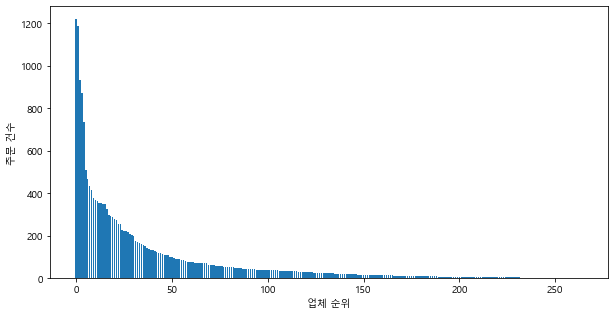

In [19]:
plt.rcParams['figure.figsize']=(10,5)
x = df_vendors.index
y = df_vendors.주문건수

plt.xlabel('업체 순위')
plt.ylabel('주문 건수')

plt.bar(x,y)
plt.show()

In [20]:
df_vendors_top = df_vendors [df_vendors['주문건수'] > 50]
df_vendors_top.tail()

,업체명,주문건수
77,벤트리,54
78,인프라텍,53
79,네오커머스,52
80,주식회사 프라임티에이시,52
81,(주)테라토닉,51


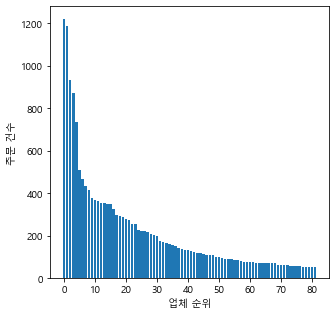

In [21]:
plt.rcParams['figure.figsize']=(5,5)
x = df_vendors_top.index
y = df_vendors_top.주문건수

plt.xlabel('업체 순위')
plt.ylabel('주문 건수')

plt.bar(x,y)
plt.show()

In [22]:
# 주문건수 top 업체의 일자별 주문 현황
df_vendors_top.head()

,업체명,주문건수
0,오름,1220
1,창신리빙,1189
2,(주)여우미,932
3,(주)세상담기,874
4,하우스플러스(주),734


In [23]:
df_solditems_오름 = df_solditems [df_solditems['업체명'] == '오름']
df_solditems_오름.head(2)

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명_x,옵션명,수량,판매가,...,주문일자,상품명_y,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비_y,판매상태,전시상태
9051,1808021052211023,1,2018-08-02 10:59:34,구매확정,서울 양천구 목동서로 225,G1808011449_5989,(상품평 이벤트)[앳홈]삼나무 원목 발받침대 1+1,NaN,1,16860.0,...,2018-08-02,[앳홈]삼나무 원목 발받침대 1+1,오름,학생/사무/유아동가구,앳홈,일반,18900.0,0,판매중,Y
9292,1808070855541982,1,2018-08-07 08:57:44,구매확정,서울 영등포구 도영로7길 7,G1808011520_6049,(상품평 이벤트)[앳홈]원목 컬러 접이식 테이블,색상:블랙,1,18780.0,...,2018-08-07,[앳홈]원목 컬러 접이식 테이블,오름,침실/거실/주방가구,앳홈,일반,19900.0,0,판매중,Y


In [57]:
df_solditems_오름.shape

(1220, 24)

In [24]:
df_solditems_오름_count = df_solditems_오름.groupby('주문일자').주문일시.count().to_frame()
df_solditems_오름_count.columns = ['주문건수']
df_solditems_오름_count

,주문건수
주문일자,
2018-08-02,1
2018-08-07,1
2018-08-09,3
2018-08-10,1
2018-08-13,2
...,...
2018-11-03,6
2018-11-04,6
2018-11-05,22


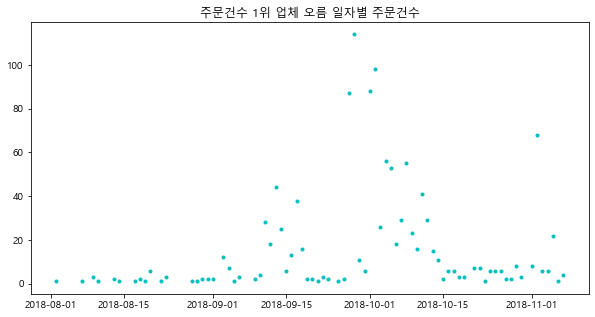

In [25]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_solditems_오름_count.index, df_solditems_오름_count.values, marker = '.', color = 'c')

plt.title('주문건수 1위 업체 오름 일자별 주문건수')
plt.show()


In [26]:
df_solditems_오름_count.shape

(78, 1)

In [27]:
df_solditems_오름_count.dtypes

주문건수    int64
dtype: object

In [28]:
x = []
for i in range(0, 78) :
    x.append(i)

In [29]:
df_solditems_오름_count['dateno'] = x
df_solditems_오름_count

,주문건수,dateno
주문일자,,
2018-08-02,1,0
2018-08-07,1,1
2018-08-09,3,2
2018-08-10,1,3
2018-08-13,2,4
...,...,...
2018-11-03,6,73
2018-11-04,6,74
2018-11-05,22,75


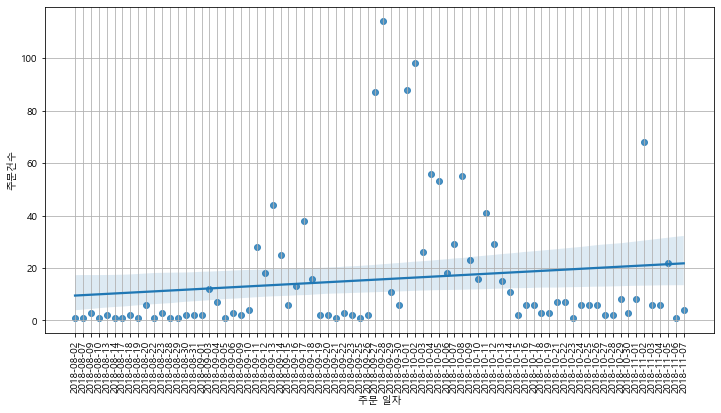

In [30]:
import seaborn as sns
import numpy as np


plt.rcParams["figure.figsize"] = (12,6) 

sns.regplot(x = df_solditems_오름_count['dateno'], y = df_solditems_오름_count['주문건수'], data =df_solditems_오름_count)
plt.xticks(np.arange(78), df_solditems_오름_count.index, rotation = 90, size = 10)
plt.xlabel('주문 일자')
plt.grid()
plt.show()


In [31]:
z = np.polyfit(df_solditems_오름_count['주문건수'], df_solditems_오름_count['dateno'], 1)
f = np.poly1d(z)
x_minmax = np.array([min(df_solditems_오름_count['주문건수']), max(df_solditems_오름_count['주문건수'])])
print(z[0])

fit_y = x_minmax * z[0] + z[1]

0.14010504388413944


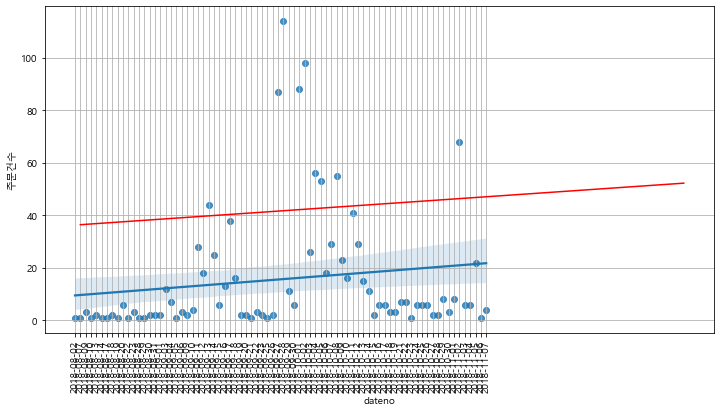

In [32]:
sns.regplot(x = df_solditems_오름_count['dateno'], y = df_solditems_오름_count['주문건수'], data =df_solditems_오름_count)
plt.plot(x_minmax, fit_y, color = 'red') 
plt.xticks(np.arange(78), df_solditems_오름_count.index, rotation = 90, size = 10)
plt.grid()
plt.show()

In [33]:
est_y = np.array(df_solditems_오름_count['주문건수']) * z[0] + z[1]

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(df_solditems_오름_count['dateno'], est_y)
r2

0.022341261313104654

In [35]:
df_solditems_오름_count [df_solditems_오름_count['주문건수'] > 40]

,주문건수,dateno
주문일자,,
2018-09-13,44,25
2018-09-27,87,38
2018-09-28,114,39
2018-10-01,88,42
2018-10-02,98,43
2018-10-04,56,45
2018-10-05,53,46
2018-10-08,55,49
2018-10-11,41,52


In [36]:
df_solditems_오름_count_copy = df_solditems_오름_count

In [37]:
outlier = df_solditems_오름_count [df_solditems_오름_count['주문건수'] > 40].index
df_solditems_오름_count_copy.drop(outlier, inplace = True)
df_solditems_오름_count_copy.shape

(68, 2)

In [38]:
from datetime import datetime

Year = []
MD = []


for i in range(68) :
    
    y = df_solditems_오름_count_copy.index[i].strftime("%Y") 
    md = df_solditems_오름_count_copy.index[i].strftime("%m-%d")
    Year.append(y)
    MD.append(md)

In [39]:
df_solditems_오름_count_copy['Year'] = Year
df_solditems_오름_count_copy['MandD'] = MD

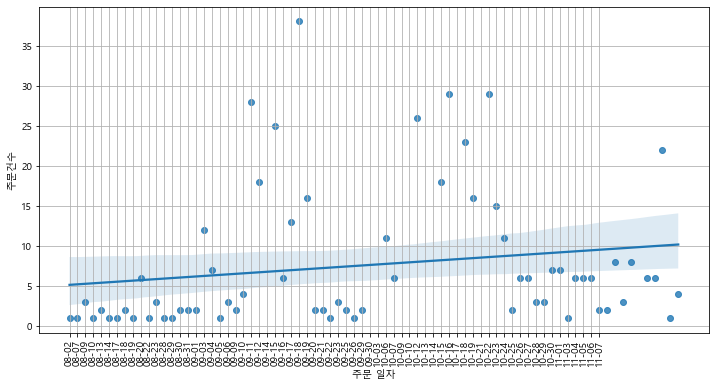

In [40]:
plt.rcParams["figure.figsize"] = (12,6) 

sns.regplot(x = df_solditems_오름_count_copy['dateno'], y = df_solditems_오름_count_copy['주문건수'], data =df_solditems_오름_count_copy)
plt.xticks(np.arange(68), df_solditems_오름_count_copy['MandD'], rotation = 90, size = 10)
plt.xlabel('주문 일자')
plt.grid()
plt.show()

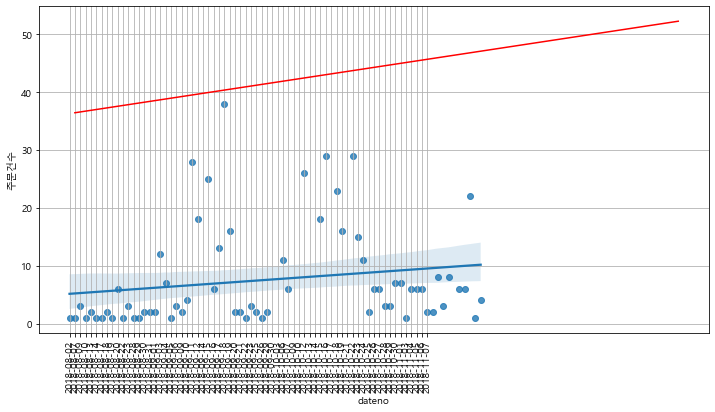

In [42]:
sns.regplot(x = df_solditems_오름_count_copy['dateno'], y = df_solditems_오름_count_copy['주문건수'], data =df_solditems_오름_count_copy)
plt.plot(x_minmax, fit_y, color = 'red') 
plt.xticks(np.arange(68), df_solditems_오름_count_copy.index, rotation = 90, size = 10)
plt.grid()
plt.show()

In [43]:
z = np.polyfit(df_solditems_오름_count_copy['주문건수'], df_solditems_오름_count_copy['dateno'], 1)
f = np.poly1d(z)
x_minmax = np.array([min(df_solditems_오름_count_copy['주문건수']), max(df_solditems_오름_count_copy['주문건수'])])
print(z[0])

fit_y = x_minmax * z[0] + z[1]

0.4890153458650132


In [44]:
est_y = np.array(df_solditems_오름_count_copy['주문건수']) * z[0] + z[1]

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(df_solditems_오름_count_copy['dateno'], est_y)
r2

0.03195794212261116

In [46]:
topvendors = df_vendors_top['업체명']
topvendors[0:10]

0           오름
1         창신리빙
2       (주)여우미
3      (주)세상담기
4    하우스플러스(주)
5    영성산업 로제까사
6           두닷
7           고웰
8    (주)에스엠퓨처스
9          바이올
Name: 업체명, dtype: object

In [47]:
for vendor in topvendors[1:5] :
    name = 'df_solditems_'+ vendor
    
    namefiltering = name + " = df_solditems [df_solditems['업체명'] == " + "'" + vendor + "'" + ']'
    grouping = name + '_count = ' + name + ".groupby('주문일자').주문일시.count().to_frame()"
    columnchange = name + "_count.columns = ['주문건수']"
        
    print(namefiltering)
    print(grouping)
    print(columnchange)
    print()
    

df_solditems_창신리빙 = df_solditems [df_solditems['업체명'] == '창신리빙']
df_solditems_창신리빙_count = df_solditems_창신리빙.groupby('주문일자').주문일시.count().to_frame()
df_solditems_창신리빙_count.columns = ['주문건수']

df_solditems_(주)여우미 = df_solditems [df_solditems['업체명'] == '(주)여우미']
df_solditems_(주)여우미_count = df_solditems_(주)여우미.groupby('주문일자').주문일시.count().to_frame()
df_solditems_(주)여우미_count.columns = ['주문건수']

df_solditems_(주)세상담기 = df_solditems [df_solditems['업체명'] == '(주)세상담기']
df_solditems_(주)세상담기_count = df_solditems_(주)세상담기.groupby('주문일자').주문일시.count().to_frame()
df_solditems_(주)세상담기_count.columns = ['주문건수']

df_solditems_하우스플러스(주) = df_solditems [df_solditems['업체명'] == '하우스플러스(주)']
df_solditems_하우스플러스(주)_count = df_solditems_하우스플러스(주).groupby('주문일자').주문일시.count().to_frame()
df_solditems_하우스플러스(주)_count.columns = ['주문건수']



In [58]:
df_solditems_오름 = df_solditems [df_solditems['업체명'] == '오름']
df_solditems_오름_count = df_solditems_창신리빙.groupby('주문일자').주문일시.count().to_frame()
df_solditems_오름_count.columns = ['주문건수']

df_solditems_창신리빙 = df_solditems [df_solditems['업체명'] == '창신리빙']
df_solditems_창신리빙_count = df_solditems_창신리빙.groupby('주문일자').주문일시.count().to_frame()
df_solditems_창신리빙_count.columns = ['주문건수']

df_solditems_여우미 = df_solditems [df_solditems['업체명'] == '(주)여우미']
df_solditems_여우미_count = df_solditems_여우미.groupby('주문일자').주문일시.count().to_frame()
df_solditems_여우미_count.columns = ['주문건수']

df_solditems_세상담기 = df_solditems [df_solditems['업체명'] == '(주)세상담기']
df_solditems_세상담기_count = df_solditems_세상담기.groupby('주문일자').주문일시.count().to_frame()
df_solditems_세상담기_count.columns = ['주문건수']

df_solditems_하우스플러스 = df_solditems [df_solditems['업체명'] == '하우스플러스(주)']
df_solditems_하우스플러스_count = df_solditems_하우스플러스.groupby('주문일자').주문일시.count().to_frame()
df_solditems_하우스플러스_count.columns = ['주문건수']

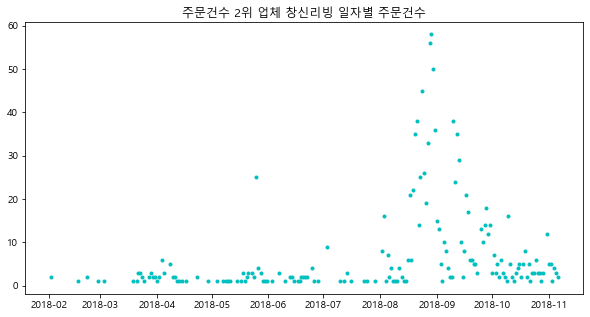

In [49]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_solditems_창신리빙_count.index, df_solditems_창신리빙_count.values, marker = '.', color = 'c')

plt.title('주문건수 2위 업체 창신리빙 일자별 주문건수')
plt.show()

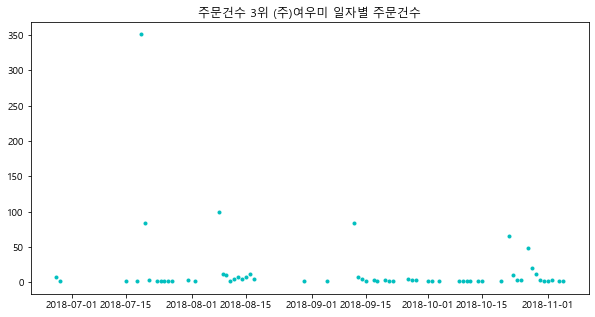

In [50]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_solditems_여우미_count.index, df_solditems_여우미_count.values, marker = '.', color = 'c')

plt.title('주문건수 3위 (주)여우미 일자별 주문건수')
plt.show()

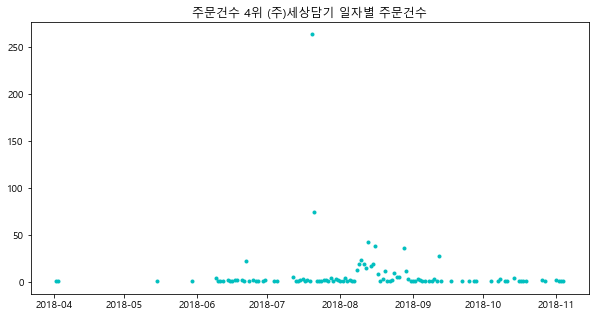

In [51]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_solditems_세상담기_count.index, df_solditems_세상담기_count.values, marker = '.', color = 'c')

plt.title('주문건수 4위 (주)세상담기 일자별 주문건수')
plt.show()

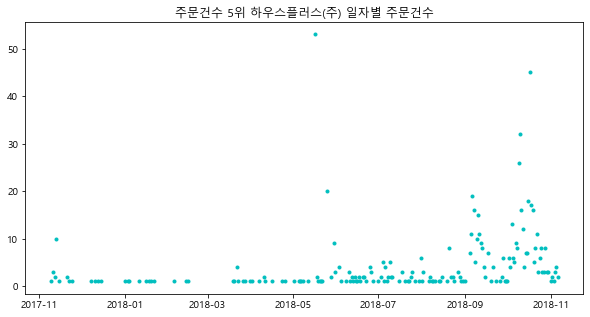

In [52]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_solditems_하우스플러스_count.index, df_solditems_하우스플러스_count.values, marker = '.', color = 'c')

plt.title('주문건수 5위 하우스플러스(주) 일자별 주문건수')
plt.show()

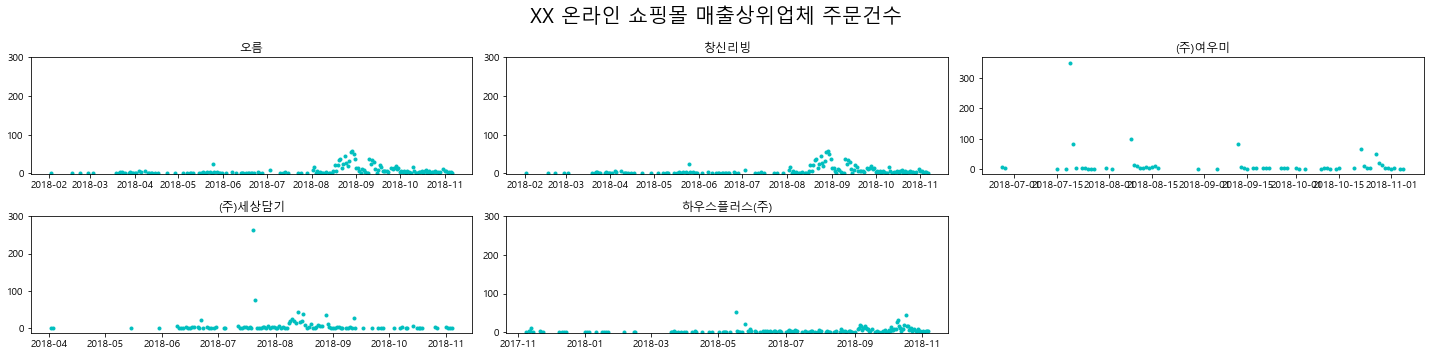

In [59]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

ax1.scatter(df_solditems_오름_count.index, df_solditems_오름_count.values, marker = '.', color = 'c')
ax2.scatter(df_solditems_창신리빙_count.index, df_solditems_창신리빙_count.values, marker = '.', color = 'c')
ax3.scatter(df_solditems_여우미_count.index, df_solditems_여우미_count.values, marker = '.', color = 'c')
ax4.scatter(df_solditems_세상담기_count.index, df_solditems_세상담기_count.values, marker = '.', color = 'c')
ax5.scatter(df_solditems_하우스플러스_count.index, df_solditems_하우스플러스_count.values, marker = '.', color = 'c')

ax1.set_yticks(range(0,400,100))
ax2.set_yticks(range(0,400,100))
ax3.set_yticks(range(0,400,100))
ax4.set_yticks(range(0,400,100))
ax5.set_yticks(range(0,400,100))

ax1.set_title('오름')
ax2.set_title('창신리빙')
ax3.set_title('(주)여우미')
ax4.set_title('(주)세상담기')
ax5.set_title('하우스플러스(주)')


fig.suptitle('XX 온라인 쇼핑몰 매출상위업체 주문건수', size=20)
fig.tight_layout()

plt.show()